# Number Recognition

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D

## Load the Dataset

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  # Reshape for CNN input
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

11490434/11490434 [==============================] - 9s 1us/step


In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 79s 52ms/step - loss: 0.1288 - accuracy: 0.9602 - val_loss: 0.0573 - val_accuracy: 0.9827
Epoch 2/10
1500/1500 [==============================] - 74s 50ms/step - loss: 0.0414 - accuracy: 0.9873 - val_loss: 0.0513 - val_accuracy: 0.9838
Epoch 3/10
1500/1500 [==============================] - 77s 51ms/step - loss: 0.0257 - accuracy: 0.9918 - val_loss: 0.0446 - val_accuracy: 0.9861
Epoch 4/10
1500/1500 [==============================] - 81s 54ms/step - loss: 0.0164 - accuracy: 0.9945 - val_loss: 0.0451 - val_accuracy: 0.9884
Epoch 5/10
1500/1500 [==============================] - 83s 55ms/step - loss: 0.0124 - accuracy: 0.9958 - val_loss: 0.0468 - val_accuracy: 0.9891
Epoch 6/10
1500/1500 [==============================] - 76s 51ms/step - loss: 0.0090 - accuracy: 0.9972 - val_loss: 0.0560 - val_accuracy: 0.9852
Epoch 7/10
1500/1500 [==============================] - 73s 49ms/step - loss: 0.0076 - accuracy: 0.9974 - val_loss: 0.0500 -

In [6]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

313/313 [==============================] - 2s 7ms/step - loss: 0.0520 - accuracy: 0.9895
Test loss: 0.0520, Test accuracy: 0.9895


In [7]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions,axis=1)

313/313 [==============================] - 2s 7ms/step


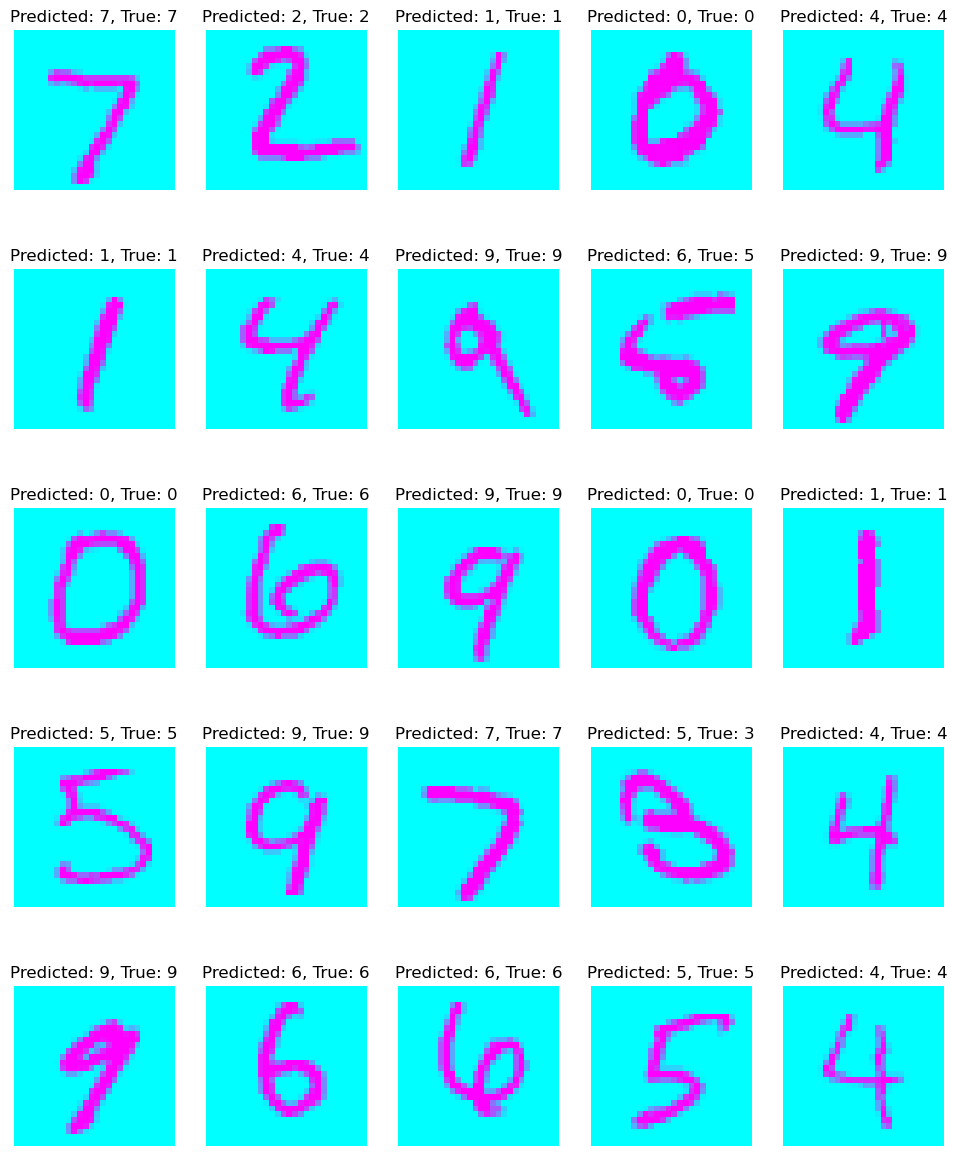

In [49]:
plt.figure(figsize=(12,15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='cool')
    plt.title(f"Predicted: {predicted_labels[i]}, True: {np.argmax(y_test[i])}")
    plt.axis('off')
plt.show()

# Thank You!